# Type of Convergence
- Tương tự như giới hạn trong giải tích, với thống kê, ta cũng xem xét tính giới hạn của các biến ngẫu nhiên. Theo các chương trước đó, một biến ngẫu nhiên là một dictionary từ map từ $ \varOmega \rightarrow \R $
- Các giới hạn sẽ được xem xét thành 2 phần chính : giới hạn của các biến trong tập $\varOmega$ và tập $\R$

## Almost Sure Convergence
- Nếu ta có một giá trị $ \omega \in \varOmega $ sau đó xem xét một chuỗi giá trị $ (X_1(\omega),X_2(\omega), ..., X_n(\omega) ) $ và dãy này sẽ dần dần hội tụ tới $ X(\omega) $ 
- Công thức : $$ P(\omega \in \varOmega : \lim _{n \rightarrow \infty} X_n(\omega) = X(\omega)) = 1  \\ \Leftrightarrow P(|X_n - X| < \epsilon ) = 1$$


Ví dụ : cho các biến ngẫu nhiên $ X_i$ là các biến ngẫu nhiên phân bố đều. Tìm biến ngẫu nhiên $X_(n) = max (X_1, X_2, .., X_n) $

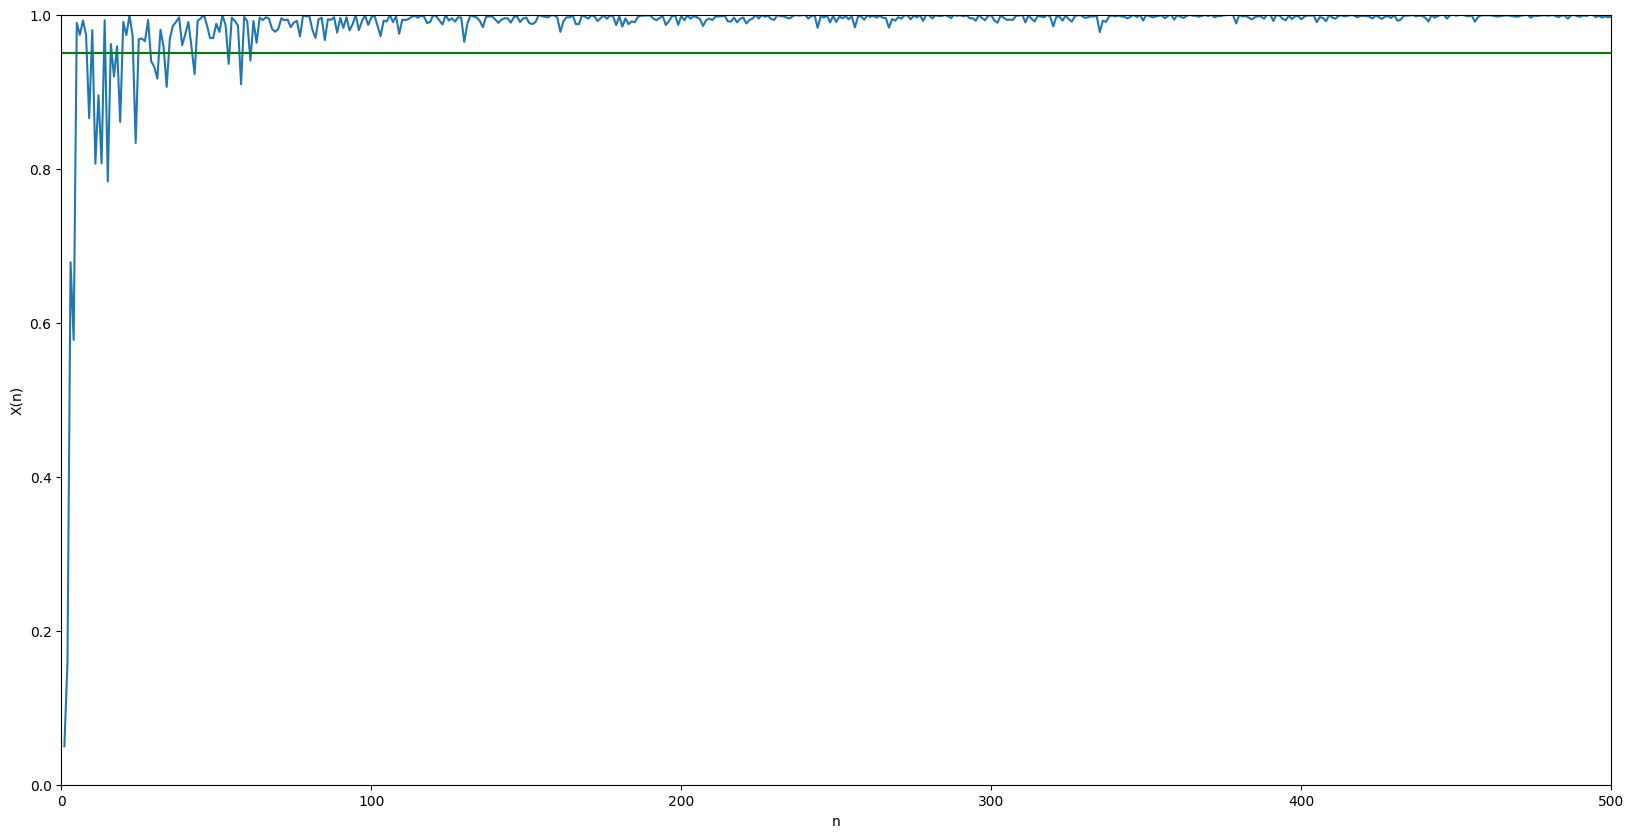

In [3]:
from scipy import stats
import matplotlib.pyplot as plt
u =  stats.uniform()
xn = lambda i : u.rvs(i).max()

plt.figure(figsize= (20, 10))
plt.plot([i for i in range(1,501)], [xn(i) for i in range(1,501)])
plt.plot([0, 500], [0.95, 0.95], color = 'green')
plt.ylabel("X(n)")
plt.xlabel("n")
plt.xlim(0, 500)
plt.ylim(0, 1)
plt.show()



-  Dựa vào đồ thị trên có thể thấy khi n tiến tới vô cùng thì X(n) tiến dần tới 1 
- Với ngưỡng điều kiện $ \epsilon = 0.05 $ và $ X = 1$ khi đó với $n_{\epsilon}$ là bao nhiêu thì hội tụ tuyệt đối ? => tìm $ P(X_n > 0.95) = 1 $ với giá trị sai lệch dưới 1%

In [4]:
import numpy as np 
np.mean([xn(90) > 0.95 for _ in range(1000)])

0.992

## Convergence in Probability 
- Một chuỗi các biến ngẫu nhiên $ X_1, X_2, X_3, ... $ được gọi là hội tụ xác suất tới một biến ngẫu nhiên X khi : $$ \lim _{n \rightarrow \infty} P(|X_n - X| \geq \epsilon ) = 0 $$
- Khác với hội tụ tuyệt đối, hội tụ xác suất chỉ xét hội tụ trên một dãy xác suất trong khi hội tụ tuyệt đối xét hội tụ trên một dãy biến ngẫu nhiên


- Ví dụ : Xét một dãy biến ngẫu nhiên $ \{X_1, X_2, ..., X_n\} $ là các biến ngẫu nhiên phân bố đều trong khoảng (0,1), nó được tạo ra bằng cách chia các khoảng điều nhau từ 0 đến 1. $$ X_1 \rightarrow (0, 1]  \\  X_2 \rightarrow (0, \frac 1 2 ] \\ X_3 \rightarrow (\frac 1 2, 1] $$

In [5]:
make_interval = lambda n : np.array(list(zip(range(n + 1), range(1, n + 1)))) / n
intervals = np.vstack([make_interval(i) for i in range(1, 50)])
intervals

array([[0.        , 1.        ],
       [0.        , 0.5       ],
       [0.5       , 1.        ],
       ...,
       [0.93877551, 0.95918367],
       [0.95918367, 0.97959184],
       [0.97959184, 1.        ]])

In [6]:
# tính  toán sự xuất hiện của chuỗi bit 
bits = lambda n : ((intervals[:, 0] < n) & (n <= intervals[:, 1])).astype(int)

sample = np.vstack([bits(u.rvs()) for _ in range(1000)]).mean(axis = 0)

In [7]:
sample

array([1.   , 0.519, 0.481, ..., 0.019, 0.021, 0.023])

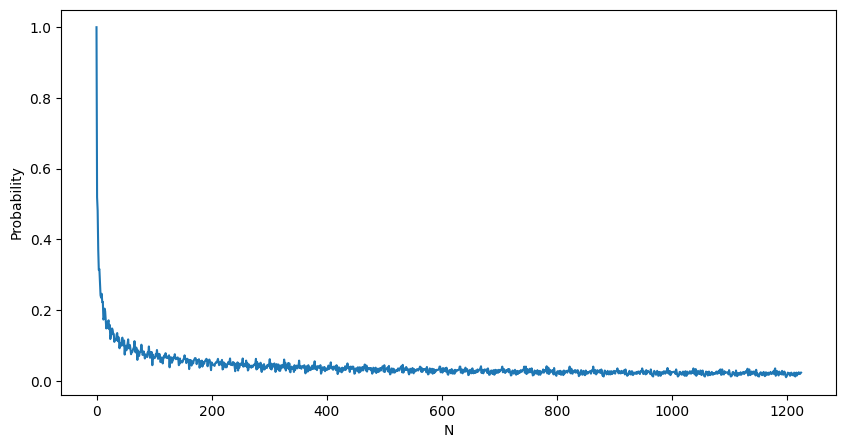

In [8]:
plt.figure(figsize= (10, 5))
plt.plot([i for i in range(len(sample))], sample)
plt.ylabel("Probability")
plt.xlabel("N")
plt.show()

## Convergence in Distribution 
- Hội tụ phân bố cho rằng nếu một chuỗi biến ngẫu nhiên $ X_1, X_2, X_3, ... $ có n tiến tới vô cùng thì khi đó $ X_n \rightarrow X $ : $$ \lim _{n \rightarrow \infty} F_{X_n} (x) = F_X(x) $$
- Hội tụ phân bố được xem là hội tụ lỏng, yếu nhất trong 3 loại hội tụ trên. 


## Limit Theorems 

### Weak Law of Large Numbers 
- Cho tập giá trị $\{ X_1, X_2, ..., X_n\} $ là một tập các biến ngẫu nhiên với giá trị  mean là $\mu$ Nếu đặt $ \bar X_n = \frac 1 n \sum_k X_k $ khi đó giá trị của $ \bar X_n \rightarrow \mu  $

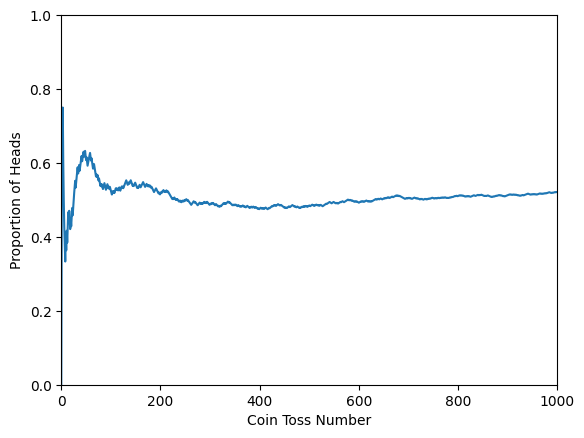

In [9]:
rng = np.random.default_rng()
# Bernoulli distribution 
def bernoulli(p, n) : 
    U = rng.random(n)
    return U < p

# Show Law of large number
n = 10000
p = 0.5
toss = bernoulli(p, n)
avg = [sum(toss[:i]) / i for i in range(1, n + 1)]
plt.plot(avg)
plt.xlabel("Coin Toss Number")
plt.ylabel("Proportion of Heads")
plt.axis([0, 1000, 0, 1])
plt.show()

### Strong Law of Large Numbers 
- Luật số lớn mạnh sử dụng hội tụ gần như chắc chắn (almost sure convergence) để đảm bảo việc hội tụ tới giá trị mean của biến ngẫu nhiên x trung bình 

### Central Limit Theorem 
- Luật giới hạn trung tâm đảm bảo rằng biến ngẫu nhiên $ \bar X_n $ có phân bố gần tương đương với phân bố chuẩn với mean là $\mu$ và std là $ \frac {\sigma} {\sqrt{n}} $ 
- Ta có thể sử dụng phép biến đổi để đưa phân bố thành phân bố chuẩn 

In [17]:
# Giả sử có 10 viên xúc sắc, miêu tả lại phân bố trung bình của chúng 
n = 1000

avg = []
for i in range(2, n) : 
    a =  np.random.randint(1, 7, i)
    avg.append(np.mean(a))

In [18]:
avg[1 : 10]

[5.666666666666667,
 4.5,
 2.8,
 3.6666666666666665,
 4.0,
 3.25,
 4.0,
 4.0,
 3.090909090909091]

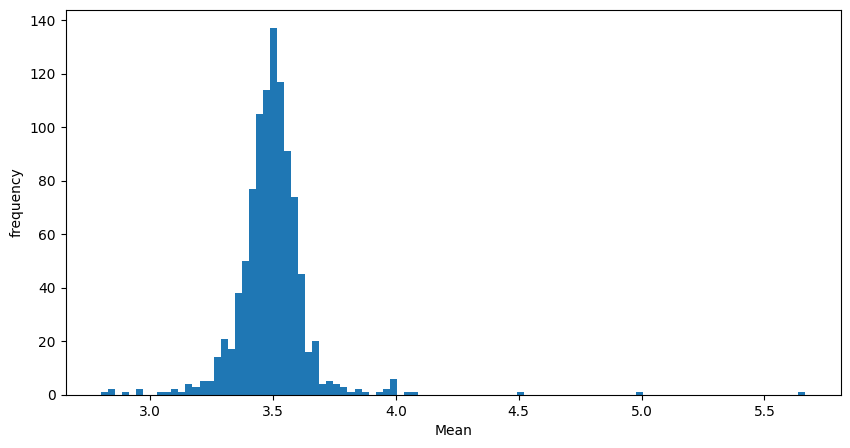

In [19]:
plt.figure(figsize= (10, 5))
plt.hist(avg, bins = 100)
plt.xlabel("Mean")
plt.ylabel("frequency")
plt.show()